# 분석결과 시각화
 - 커널 밀도 추정(kde)를 적용한 히스토그램 그리기

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols, glm


In [6]:
# 히스토그램 차트 배경 스타일 설정(dark, darkgrid, white, whitegrid)
sns.set_style('dark')


In [18]:
wine = pd.read_csv('wine.csv')
red_wine_quality = wine.loc[wine['type']=='red', 'quality']
white_wine_quality = wine.loc[wine['type']=='white', 'quality']

In [19]:
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.head())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

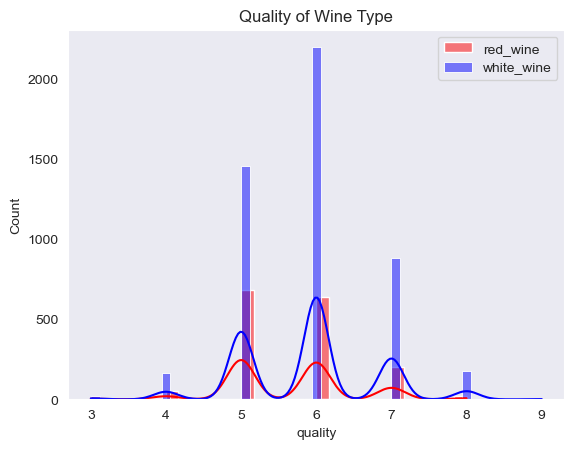

In [20]:
#distplot -> histplot
sns.histplot(data=red_wine_quality, kde=True, color='red', label='red_wine')
sns.histplot(data=white_wine_quality, kde=True, color='blue', label='white_wine')
plt.title('Quality of Wine Type')
plt.legend()
plt.show()


# 부분 회귀 플롯으로 시각화하기
- 독립변수가 2개이상인 경우 부분회귀플롯을 사용하여 하나의 독립변수가 종속변수에 미치는 영향력을 시각화 하여 분석할 수 있음
- plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
- endog: 종속변수 문자열
- exog_i : 분석 대상이 되는 독립변수 문자열
- exog_others : 나머지 독립변수 문자열의 리스트
- data ; 모든 데이터가 있는 데이터 프레임
- obs_label : 데이터 라벨링 여부
- ret_coords: 잔차 데이터 반환여부

In [21]:
#부분회귀 계산을 위해 로드
import statsmodels.api as sm

In [22]:
#fixed_acidity가 종속 변수 quality에 미치는 영향을 시각화할것임
#부분 회귀에 사용한 독립변수와 종속변수를 제외한 나머지 변수 리스트를 others변수에 저장할 것임
others = list(set(wine.columns).difference(set(['quality', 'fixed_acidity'])))

eval_env: 1


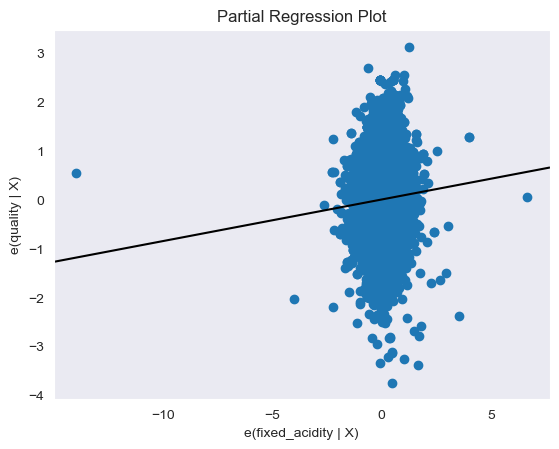

In [25]:
p, resids=sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine, ret_coords=True, obs_labels=False)
plt.show()

In [27]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
      residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + \
      density + pH + sulphates + alcohol'
regression_result = ols(Rformula, data=wine).fit()

NameError: name 'ols' is not defined

In [26]:
fig=plt.figure(figsize=(6,3))
#한꺼번에 보여주는것
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

NameError: name 'regression_result' is not defined

<Figure size 600x300 with 0 Axes>